Task 7 : Stocks Market Prediction Using Nuhmerical and Textual Data

Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [40]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
from matplotlib import style
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


In [41]:
#start and end date for the data
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today()

In [42]:
#loading the data
import yfinance as yf

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today()

stocks = yf.download("AAPL", start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [43]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481927,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [44]:
#resetting the index
stocks.reset_index(inplace=True)

In [45]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481927,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [46]:
#shape of the data
stocks.shape

(3640, 7)

In [47]:
#columns of the data
stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [48]:
#info of the data
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3640 non-null   datetime64[ns]
 1   Open       3640 non-null   float64       
 2   High       3640 non-null   float64       
 3   Low        3640 non-null   float64       
 4   Close      3640 non-null   float64       
 5   Adj Close  3640 non-null   float64       
 6   Volume     3640 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 199.2 KB


In [49]:
#statical description of the data
stocks.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3640,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3.640000e+03
mean,2017-03-26 15:03:33.626373376,63.867529,64.546143,63.223385,63.912016,61.897973,2.364727e+08
min,2010-01-04 00:00:00,6.870357,7.000000,6.794643,6.858929,5.806765,1.931047e+07
25%,2013-08-14 18:00:00,20.131072,20.289464,19.916429,20.076518,17.257506,8.899282e+07
50%,2017-03-27 12:00:00,35.333750,35.485001,35.100000,35.281250,32.934774,1.461266e+08
75%,2020-11-04 06:00:00,119.542501,120.975000,117.902502,119.292501,117.072849,3.193347e+08
max,2024-06-20 00:00:00,217.589996,220.199997,213.000000,216.669998,216.669998,1.880998e+09
std,NaN,58.705006,59.347868,58.121972,58.762252,59.203747,2.192173e+08


In [50]:
#checking for missing values
stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [51]:
#turning the date column into datetime
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481927,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


Data Visualization

Closing Price of Stocks

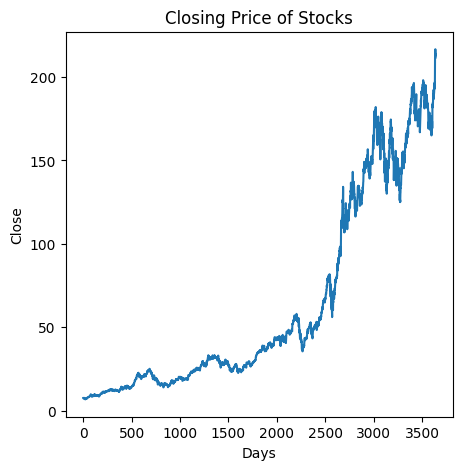

In [52]:
plt.figure(figsize=(5,5))
plt.title('Closing Price of Stocks')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(stocks['Close'])
plt.show()

Opening Price of Stocks

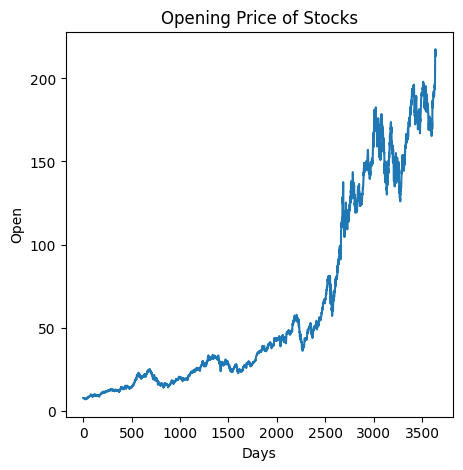

In [53]:
plt.figure(figsize=(5,5))
plt.title('Opening Price of Stocks')
plt.xlabel('Days')
plt.ylabel('Open')
plt.plot(stocks['Open'])
plt.show()

Stock Returns

Text(0.5, 1.0, 'Stock Returns')

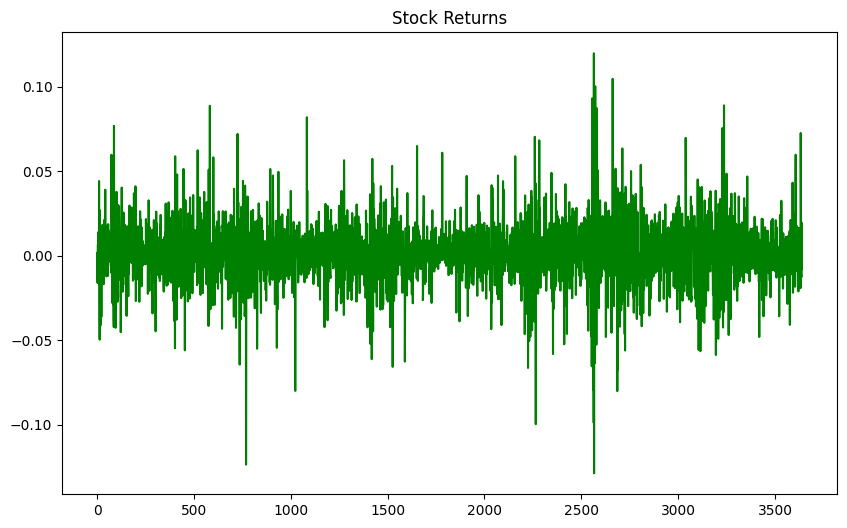

In [54]:
close = stocks['Close']
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Stock Returns")

Time series Analysis -For Close Price

In [55]:
#splitting the data into train and test
train = stocks[:1600]
test = stocks[1600:]

In [56]:
#shape of the train and test data
train.shape, test.shape

((1600, 7), (2040, 7))

Decomposition of Time series

Dickey-Fuller test


In [57]:
def adfullerTest(X):
    result = adfuller(X,autolag = 'AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No of Lags Used: %f' % result[2])
    print('Number of Obs Used: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <=0.05 :
         print("Reject against the null hypothesis, time series is stationary")
    else:
        print("Accept null hypothesis, time series is non-stationary ") 

In [58]:
from statsmodels.tsa.stattools import adfuller

adfullerTest(train['Close'])

ADF Statistic: -1.571343
p-value: 0.497971
No of Lags Used: 0.000000
Number of Obs Used: 1599.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


We can see that our statistic value of -1.4 is greater than the value of -3.437 at 1% critical value. By Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

Rolling Statistics

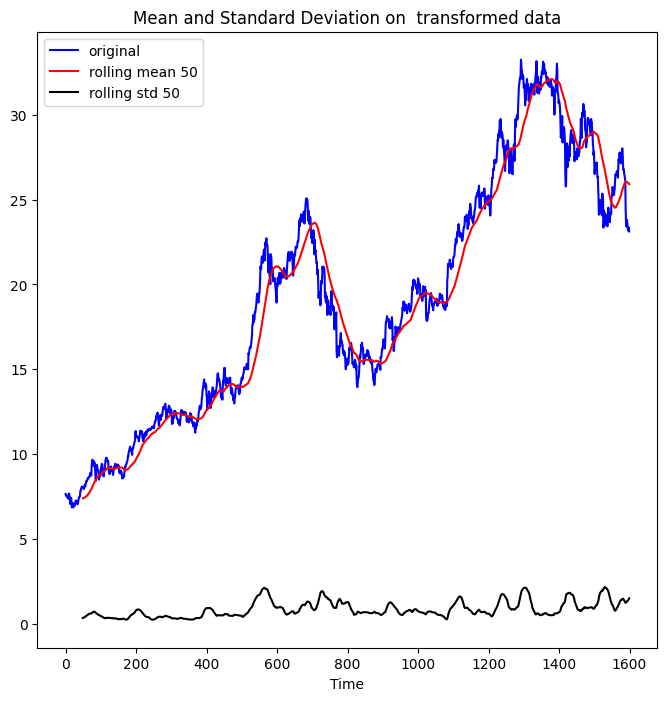

In [59]:
rolling_mean_50 = (train['Close']).rolling(window=50).mean()
rolling_std_50 = (train['Close']).rolling(window=50).std()
plt.figure(figsize = (8,8))
plt.plot((train['Close']), color = 'blue', label = 'original')
plt.plot(rolling_mean_50, color = 'red', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'black', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on  transformed data')
plt.show()

Since the data shows changing variance over time, the first thing we will do is stabilize the variance by applying log transformation using the log() function. The resulting series will be a linear time series.

Log Transfromation

In [60]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

In [61]:
from numpy import log
adfullerTest(log(train['Close']))

ADF Statistic: -2.040940
p-value: 0.268916
No of Lags Used: 0.000000
Number of Obs Used: 1599.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


Running this shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

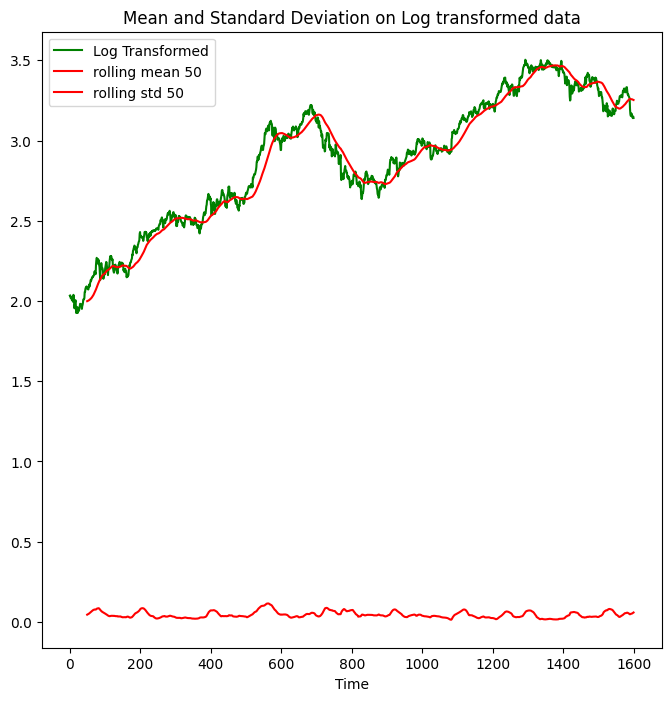

In [62]:
rolling_mean_50 = log(train['Close']).rolling(window=50).mean()
rolling_std_50 = log(train['Close']).rolling(window=50).std()
plt.figure(figsize = (8,8))
plt.plot(log(train['Close']), color = 'g', label = 'Log Transformed')
plt.plot(rolling_mean_50, color = 'r', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'r', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Log transformed data')
plt.show()

Removing Linear Trend

In [63]:
mean_log = log(train['Close']).rolling(50).mean()

In [64]:
train_log_diff = log(train['Close']) - mean_log
train_log_diff.dropna(inplace = True)
adfullerTest(train_log_diff)

ADF Statistic: -4.920769
p-value: 0.000032
No of Lags Used: 1.000000
Number of Obs Used: 1549.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Reject against the null hypothesis, time series is stationary


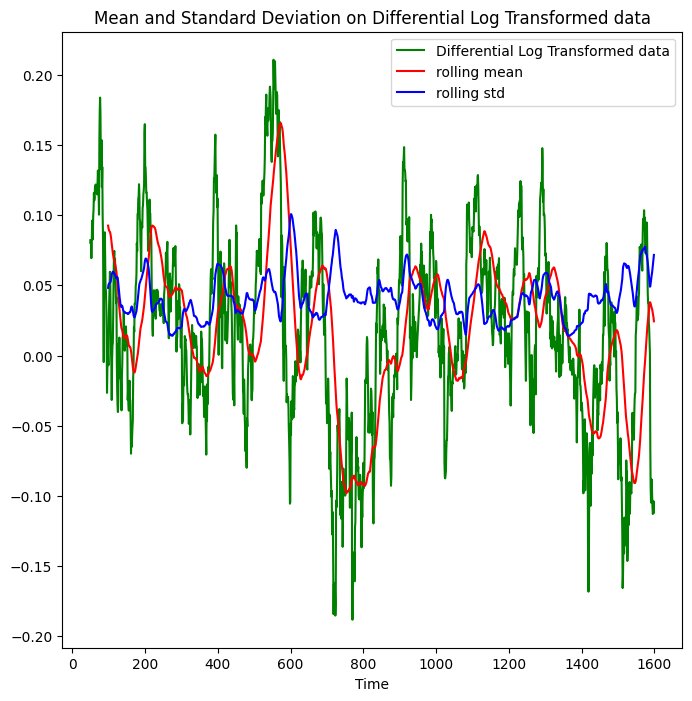

In [65]:
data=   train_log_diff
mean = data.rolling(50).mean()
std = data.rolling(50).std()
plt.figure(figsize = (8,8))
plt.plot(data, color = 'g', label = 'Differential Log Transformed data')
plt.plot(mean, color = 'r', label = 'rolling mean')
plt.plot(std, color = 'b', label = 'rolling std')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Differential Log Transformed data')
plt.show()

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure. Here we can also observe that there is no such trend in mean and Standard deviation So the now time series is statinary

Now the data is stationary we can apply ARIMA model to our data

ARIMA Model

In [66]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                             # start_p=1, 
                              #start_q=1,
                              #test="adf",
                              trace=True,
                              error_action = 'ignore',
                              suppress_warnings = True)
    return autoarima_model

In [67]:
stocks_arima = arimamodel((train_log))
stocks_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8500.662, Time=3.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8506.438, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8505.002, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8505.002, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8505.757, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8502.973, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.600 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1600
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4255.219
Date:                Thu, 20 Jun 2024   AIC                          -8506.438
Time:                        15:32:20   BIC                          -8495.684
Sample:                             0   HQIC                         -8502.444
                               - 1600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.000      1.626      0.104      -0.000       0.002
sigma2         0.0003   5.65e-06     50.620      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):              1376.33
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.31
Prob(H) (two-sided):                  0.33   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

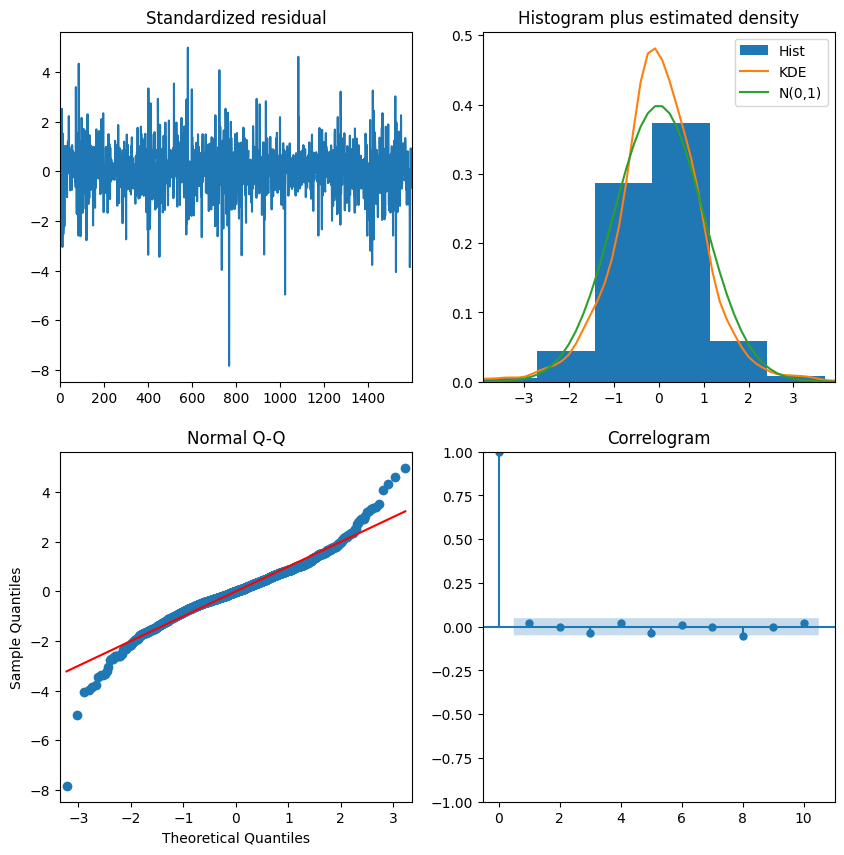

In [68]:
stocks_arima.plot_diagnostics(figsize=(10,10))
plt.show()

Predictions on test data

Text(0, 0.5, 'Actual Stock Price')

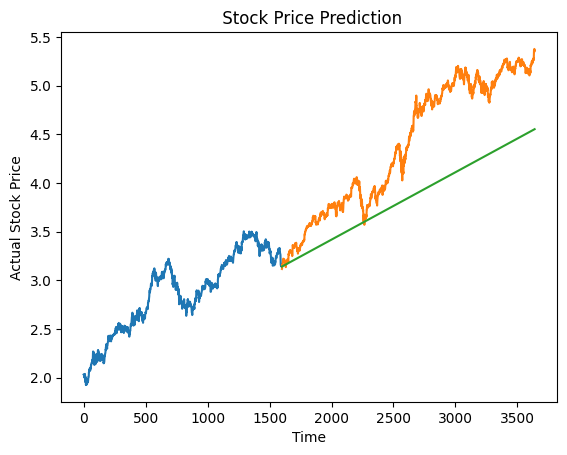

In [69]:
predict_ClosePrice = stocks_arima.predict(n_periods = len(test_log))
predict_ClosePrice = pd.DataFrame(predict_ClosePrice,index = test_log.index,columns=['predict_ClosePrice'])
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predict_ClosePrice, label='Prediction')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

Validation of the Arima Model

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('Mean Squared Error      ',mean_squared_error(test_log, predict_ClosePrice))
print('Root Mean_Squared_Error ',np.sqrt(mean_squared_error(test_log, predict_ClosePrice)))
print('Mean Absolute Error     ',mean_absolute_error(test_log, predict_ClosePrice))
print('R-Squared               ',r2_score(test_log, predict_ClosePrice))

Mean Squared Error       0.38228230418225956
Root Mean_Squared_Error  0.618289822156454
Mean Absolute Error      0.5434400444756198
R-Squared                0.14733055100360504


New dataset

In [71]:
#reading the data
newsdata = pd.read_csv('india-news-headlines.csv')

In [72]:
newsdata.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [73]:
#turning publish date into datetime
newsdata['publish_date'] = pd.to_datetime(newsdata['publish_date'], format='%Y%m%d')

In [74]:
newsdata.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [75]:
#info of the data
newsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 83.6+ MB


In [76]:
#shape of the data
newsdata.shape

(3650970, 3)

In [77]:
#columns of the data
newsdata.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [78]:
#checking for missing values
newsdata.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

Analaysing "HEADLINE_CATEGORY" with "CITIES"

In [79]:
newsdata['headline_category'].value_counts()

headline_category
india                                                    297491
unknown                                                  209583
city.mumbai                                              150451
city.delhi                                               137648
business.india-business                                  121195
                                                          ...  
nepal-india-earthquake.opinion                                8
elections.lok-sabha-elections-2019.tripura.news               8
best-products.home-decor-and-garden.living-room-decor         8
profiles.india-profiles                                       8
pms-us-visit                                                  8
Name: count, Length: 1041, dtype: int64

In [80]:
#create a dataset cities from newsdata 
cities = newsdata[newsdata['headline_category'].str.contains('city')]
cities.head()

,publish_date,headline_category,headline_text
273,2001-01-04,city.bengaluru,Three in race for chief secy's post
274,2001-01-04,city.patna,Druggists' stir leads to shortage of medicines
277,2001-01-04,city.bengaluru,He's not so inscrutable
278,2001-01-04,city.delhi,DPCC stages Nyay rally
642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors


In [81]:
#add a column city_name to newsdata 
city = pd.DataFrame(columns = ['city_name'])
city['city_name'] = cities.headline_category.str.split('.',expand = True)[1]
cities = pd.concat([cities, city], axis = 1)
cities.head()

,publish_date,headline_category,headline_text,city_name
273,2001-01-04,city.bengaluru,Three in race for chief secy's post,bengaluru
274,2001-01-04,city.patna,Druggists' stir leads to shortage of medicines,patna
277,2001-01-04,city.bengaluru,He's not so inscrutable,bengaluru
278,2001-01-04,city.delhi,DPCC stages Nyay rally,delhi
642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors,patna


In [82]:
#drop the column headline_category
cities.drop(columns = ['headline_category'], inplace = True)

In [83]:
cities.head()

,publish_date,headline_text,city_name
273,2001-01-04,Three in race for chief secy's post,bengaluru
274,2001-01-04,Druggists' stir leads to shortage of medicines,patna
277,2001-01-04,He's not so inscrutable,bengaluru
278,2001-01-04,DPCC stages Nyay rally,delhi
642,2001-01-10,Fend for yourselves; Pande tells doctors,patna


In [84]:
#grouping the data by city_name 
cites = cities.groupby(cities['city_name']).agg({'headline_text':'count'}).reset_index()
cites.head()

,city_name,headline_text
0,agartala,1249
1,agra,6209
2,ahmedabad,98269
3,ajmer,2033
4,allahabad,20864


In [85]:
#rename the column headline_text to headline_count
cites.rename(columns = {'headline_text':'headline_count'}, inplace = True)

In [86]:
#sorting the data by headline_count
cites = cites.sort_values(by='headline_count',ascending=False)
cites.head()

,city_name,headline_count
47,mumbai,150451
18,delhi,137648
27,hyderabad,119024
12,chandigarh,117718
9,bengaluru,98635


In [87]:
#top 10 cities with most headlines
top10cites = cites.head(10)
top10cites

,city_name,headline_count
47,mumbai,150451
18,delhi,137648
27,hyderabad,119024
12,chandigarh,117718
9,bengaluru,98635
55,pune,98633
2,ahmedabad,98269
40,kolkata,93978
42,lucknow,91764
23,goa,88978


Analaysing "HEADLINE_CATEGORY" with "CATEGORIES"


In [88]:
newsdata.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [89]:
#add a column category to newsdata
newsdata['category'] = newsdata['headline_category'].str.split('.').str[0]

In [90]:
#grouping the data by category and sorting the data by headline_text in descending order in new data called categories 
categories = newsdata.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)
news_cat=categories.head(10)
news_cat.reset_index(inplace = True)
news_cat

,category,headline_text
0,city,2122043
1,india,297491
2,entertainment,232591
3,unknown,209583
4,business,160177
5,sports,131008
6,home,100215
7,world,66305
8,life-style,45214
9,tv,39296


Visualize Top 10 Categories

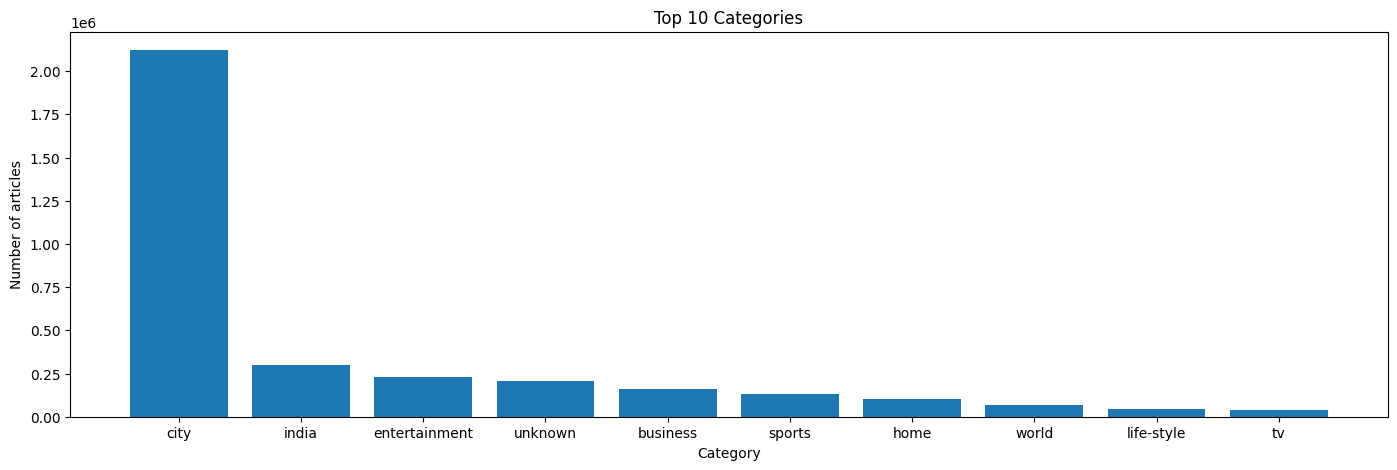

In [91]:
plt.figure(figsize=(17,5))
plt.bar(news_cat.category,height= news_cat.headline_text)
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top 10 Categories')
plt.show()

In [92]:
#drop the column headline_category
newsdata.drop(columns = ['headline_category'], inplace = True,axis=1)

In [93]:
newsdata.head()

,publish_date,headline_text,category
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,unknown
1,2001-01-02,Fissures in Hurriyat over Pak visit,unknown
2,2001-01-02,America's unwanted heading for India?,unknown
3,2001-01-02,For bigwigs; it is destination Goa,unknown
4,2001-01-02,Extra buses to clear tourist traffic,unknown


Cleaning the data -Removing Stop words


In [94]:
#converts the headline_text column to lowercase and joins all the elements into a single string separated by spaces. The resulting string is then assigned to the headline_text variable
headline_text = ' '.join(newsdata['headline_text'].str.lower())

In [95]:
#import the nltk library of naturel language processing and download the stopwords 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Amraoui
[nltk_data]     Khireddine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=1000).generate(headline_text)

Visualize the stopwors in a wordcloud 

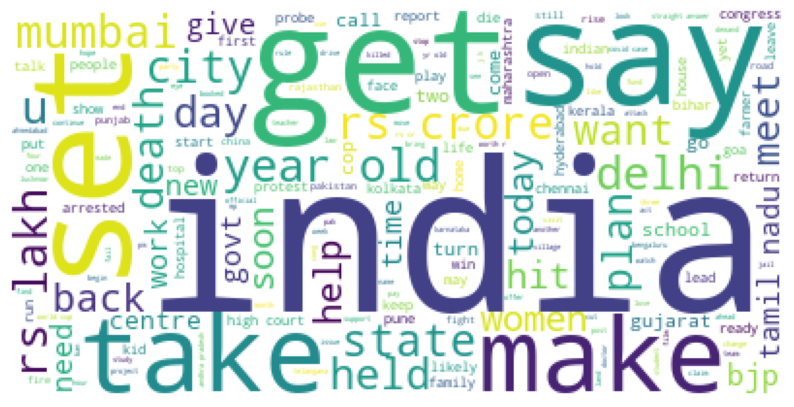

In [97]:
from matplotlib.pyplot import  rcParams
rcParams['figure.figsize'] = 10, 10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Sentimental Analaysis -- Assigning Polarity to the Headlines


In [98]:
# Create a function to get the subjectivity
def Subjectivity(text):
       return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def Polarity(text):
      return  TextBlob(text).sentiment.polarity

In [99]:
# Create two new columns 'Subjectivity' & 'Polarity' 
from textblob import TextBlob
newsdata['Subjectivity'] =newsdata['headline_text'].apply(Subjectivity)
newsdata['Polarity'] =newsdata['headline_text'].apply(Polarity)

In [100]:
#initialize the SentimentIntensityAnalyzer
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

senti = SentimentIntensityAnalyzer()

In [101]:
#create new columns for Compound, Negative, Neutral and Positive scores
newsdata['Compound'] = newsdata['headline_text'].apply(lambda s: senti.polarity_scores(s)['compound'])
newsdata['Negative'] = newsdata['headline_text'].apply(lambda s: senti.polarity_scores(s)['neg'])
newsdata['Neutral'] = newsdata['headline_text'].apply(lambda s: senti.polarity_scores(s)['neu'])
newsdata['Positive'] = newsdata['headline_text'].apply(lambda s: senti.polarity_scores(s)['pos'])

In [102]:
newsdata.head() 

,publish_date,headline_text,category,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,unknown,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,unknown,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,unknown,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,unknown,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,unknown,0.241667,0.05,0.3818,0.000,0.658,0.342


Hybrid model - Combining Stocks data and news data

In [103]:
#rename the column publish_date to Date
newsdata.rename(columns = {'publish_date':'Date'}, inplace = True)

In [104]:
#merge the stocks and newsdata on Date 
df_merge = pd.merge(stocks, newsdata, how='inner', on=['Date'])
df_merge.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,category,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2010-01-04,7.6225,7.660714,7.585,7.643214,6.470741,493729600,Bebo Khan't stop loving,entertainment,0.95,0.6000,-0.3089,0.447,0.284,0.268
1,2010-01-04,7.6225,7.660714,7.585,7.643214,6.470741,493729600,Chor Bazaari top song of 2009,entertainment,0.50,0.5000,0.2023,0.000,0.735,0.265
2,2010-01-04,7.6225,7.660714,7.585,7.643214,6.470741,493729600,2010...movies; magic 'n' more!,entertainment,0.75,0.5625,0.0000,0.000,1.000,0.000
3,2010-01-04,7.6225,7.660714,7.585,7.643214,6.470741,493729600,Ministers; Bollywood and cricket!,entertainment,0.00,0.0000,0.0000,0.000,1.000,0.000
4,2010-01-04,7.6225,7.660714,7.585,7.643214,6.470741,493729600,Shabana gives a mind-blowing performance!,entertainment,0.00,0.0000,0.0000,0.000,1.000,0.000


In [105]:
#take necessary columns
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,7.643214,0.95,0.6000,-0.3089,0.447,0.284,0.268
1,7.643214,0.50,0.5000,0.2023,0.000,0.735,0.265
2,7.643214,0.75,0.5625,0.0000,0.000,1.000,0.000
3,7.643214,0.00,0.0000,0.0000,0.000,1.000,0.000
4,7.643214,0.00,0.0000,0.0000,0.000,1.000,0.000


In [106]:
#create a dataframe contain transformation of df after minmaxscaler 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.004478,0.95,0.80000,0.340604,0.447,0.284,0.268
1,0.004478,0.50,0.75000,0.604218,0.000,0.735,0.265
2,0.004478,0.75,0.78125,0.499897,0.000,1.000,0.000
3,0.004478,0.00,0.50000,0.499897,0.000,1.000,0.000
4,0.004478,0.00,0.50000,0.499897,0.000,1.000,0.000


Model building and training

In [107]:
#split the data into X and y
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [108]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [109]:
#shape of the train and test data
X_train.shape , X_test.shape

((1538954, 6), (384739, 6))

In [110]:
#create a function that build and train the models, test models and print results 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost



def func_modelling(i):
    X = X_train[i]
    Y = Y_train
    x_test = X_test[i]

    models = [
            ('Decision Tree', DecisionTreeRegressor(max_depth=10)),
            ('Random Forest', RandomForestRegressor(n_jobs=-1, max_depth=10)),
            ('XG Boost', xgboost.XGBRegressor(n_jobs=-1, max_depth=10)),
            ("KNN", KNeighborsRegressor(n_jobs=-1)),
        ]
    results_train = []
    results_test = []
    names = []

    print('Metrics calculated while TRAINING the model')
    for name, model in models:
        model.fit(X, Y)
        train_predictions = model.predict(X)
        train_mse = mean_squared_error(Y, train_predictions)
        results_train.append(train_mse)
        names.append(name)
        print(f"{name} on TRAINING DATA MSE: {train_mse}")

    print('Evaluating the model on TESTING DATA')
    for name, model in models:
        test_predictions = model.predict(x_test)
        test_mse = mean_squared_error(Y_test, test_predictions)
        results_test.append(test_mse)
        print(f"{name} on TESTING DATA MSE: {test_mse}")

In [111]:
func_modelling(X_train.columns)

Metrics calculated while TRAINING the model
Decision Tree on TRAINING DATA MSE: 0.04568239461237216
Random Forest on TRAINING DATA MSE: 0.04553306398680688
XG Boost on TRAINING DATA MSE: 0.04362113306096186
KNN on TRAINING DATA MSE: 0.05312450325643905
Evaluating the model on TESTING DATA
Decision Tree on TESTING DATA MSE: 0.0456849880784602
Random Forest on TESTING DATA MSE: 0.04552619756101513
XG Boost on TESTING DATA MSE: 0.04532978722348127
KNN on TESTING DATA MSE: 0.05668781462400684
